In [1]:
import sys, getopt

import pandas as pd
import numpy as np

import re
import os

from style_feature import Style_Feature

from sklearn.externals import joblib

from read_path import load_img

from operator import itemgetter
import matplotlib.pyplot as plt
import cv2 


In [2]:
def     read(data_path, style_obj):
    data = None
    print "Load %s" % data_path
    data = pd.read_csv(data_path)    
    imgs = [load_img(img_path) for img_path in data['img_path'] if os.path.exists(img_path)]
    imgs = [img for img in imgs if img is not None]
    features = np.array([style_obj.get_feature(img) for img in imgs])    
    return features, data['img_path']

In [3]:
data_path = '/home/anla/Source/data/images/sample.csv'
style_obj = Style_Feature(lab = 0, gist = 1, gist_processmodel = None)    
features, img_path = read(data_path, style_obj)

Load /home/anla/Source/data/images/sample.csv


/home/anla/Apps/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [14]:
from clustering import clustering
from cluster.visualize import transform
from sklearn import svm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.cm as cm

In [6]:
glb_features = features

In [7]:
# features = features.reshape(400, 8)

In [8]:
cluster_folder = 'GMM/gist'

In [15]:

def visualize(features, P, cluster_labels, n_cluster, out_path):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(features) + (n_cluster + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    y_lower = 10
    for i in range(n_cluster):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    silhouette_avg = silhouette_score(features, cluster_labels)    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    tx = [i[0] for i in P]
    txmin, txmax = np.min(tx), np.max(tx)
    tx = [(i[0] - txmin)/(txmax - txmin) for i in P]
    
    ty = [i[1] for i in P]
    tymin, tymax = np.min(ty), np.max(ty)
    ty = [(i[1] - tymin)/(tymax - tymin) for i in P]
    
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])
    colors = cm.spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(tx, ty, marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_cluster),
                 fontsize=14, fontweight='bold')

    plt.savefig('%s/cluster.png' % out_path, bbox_inches='tight')
    plt.show()

4
Generate folder GMM/gist/spherical_4
    [90, 83, 135, 92]
For n_clusters=4, Average Silhouette Coefficient is 0.0552419837366


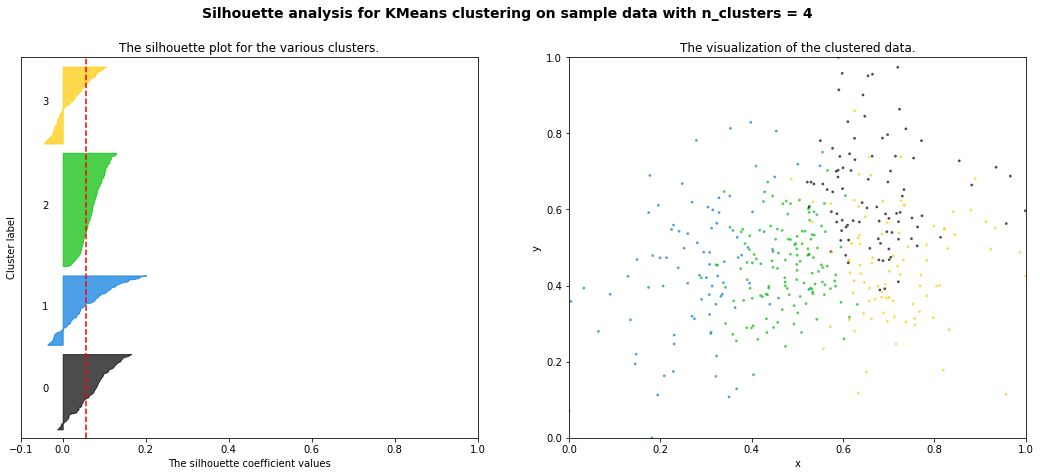

Generate folder GMM/gist/diag_4
    [91, 81, 128, 100]
For n_clusters=4, Average Silhouette Coefficient is 0.0454672476548


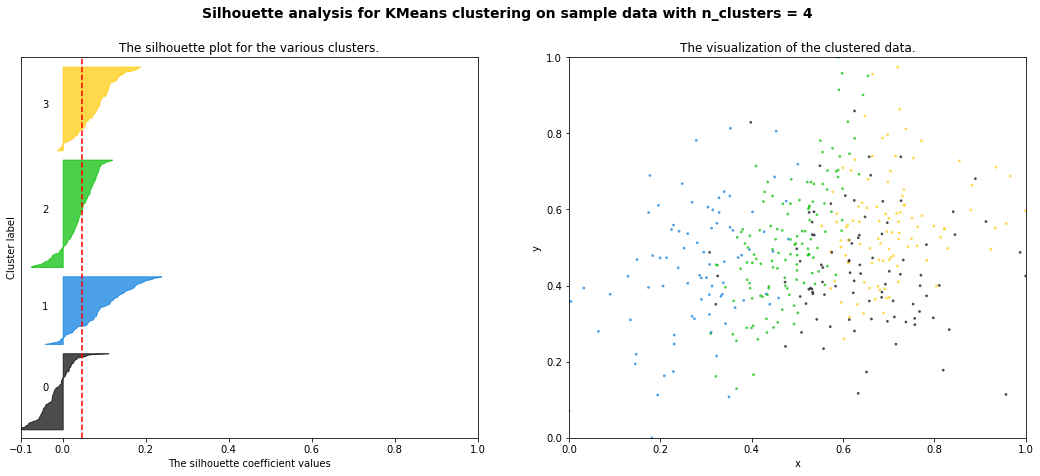

Generate folder GMM/gist/full_4
    [85, 70, 139, 106]
For n_clusters=4, Average Silhouette Coefficient is 0.0624042733508


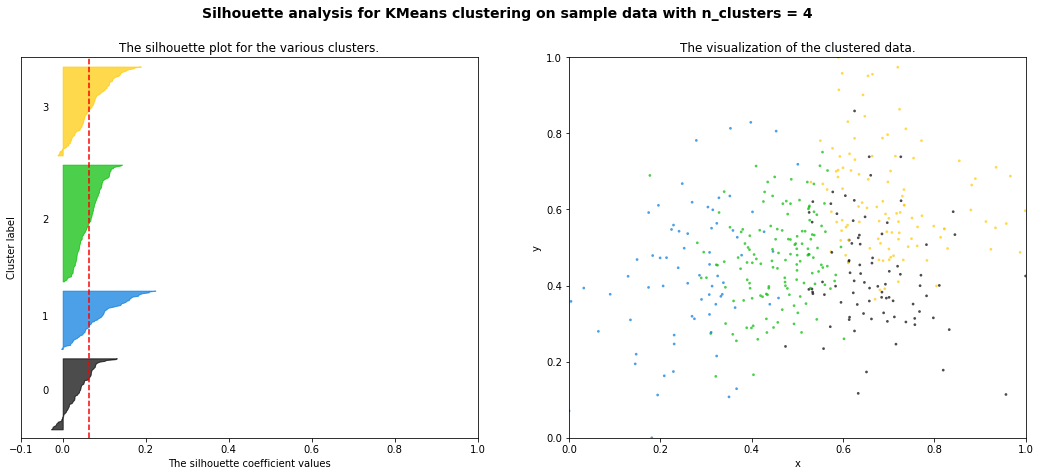

Generate folder GMM/gist/tied_4
    [97, 77, 119, 107]
For n_clusters=4, Average Silhouette Coefficient is -0.00136311169327


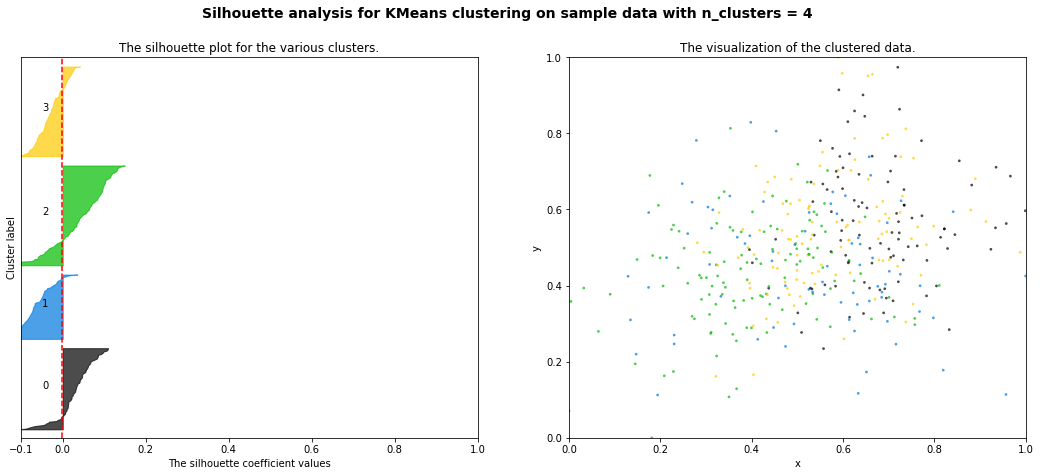

6
Generate folder GMM/gist/spherical_6
    [54, 66, 67, 60, 76, 77]
For n_clusters=6, Average Silhouette Coefficient is 0.0317218447126


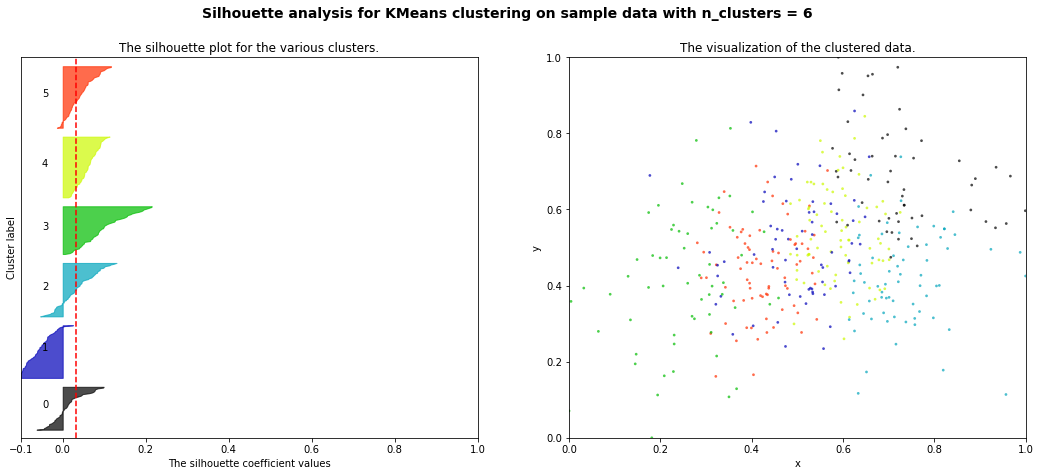

Generate folder GMM/gist/diag_6
    [69, 68, 60, 75, 63, 65]
For n_clusters=6, Average Silhouette Coefficient is 0.0155696350269


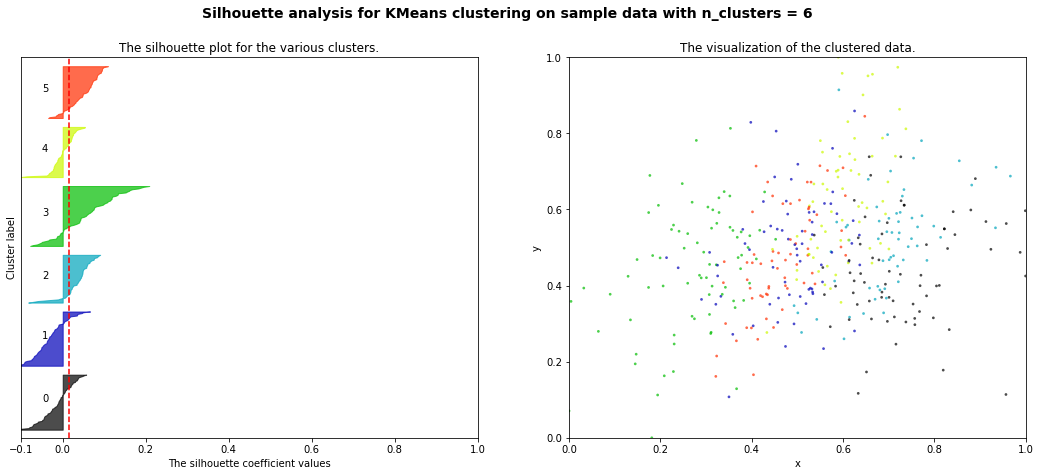

Generate folder GMM/gist/full_6
    [68, 41, 69, 83, 62, 77]
For n_clusters=6, Average Silhouette Coefficient is 0.052541414766


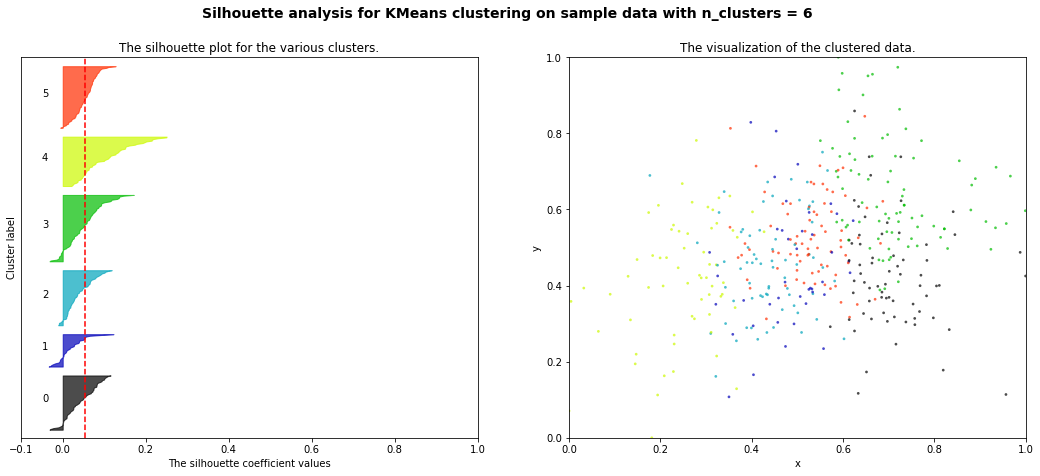

Generate folder GMM/gist/tied_6
    [33, 49, 80, 116, 84, 38]
For n_clusters=6, Average Silhouette Coefficient is -0.00112861366202


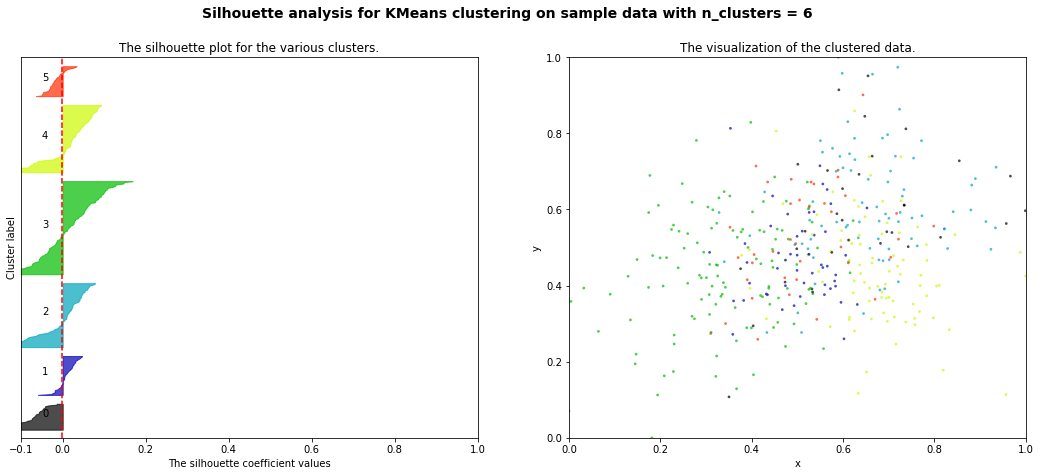

8
Generate folder GMM/gist/spherical_8
    [33, 38, 40, 57, 64, 34, 65, 69]
For n_clusters=8, Average Silhouette Coefficient is 0.0212705354141


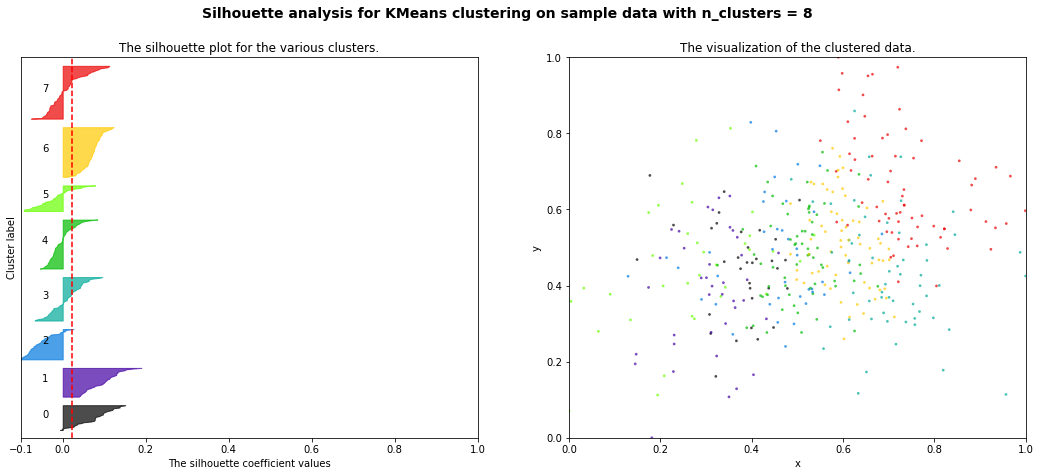

Generate folder GMM/gist/diag_8
    [62, 46, 44, 28, 49, 33, 67, 71]
For n_clusters=8, Average Silhouette Coefficient is 0.0170490725261


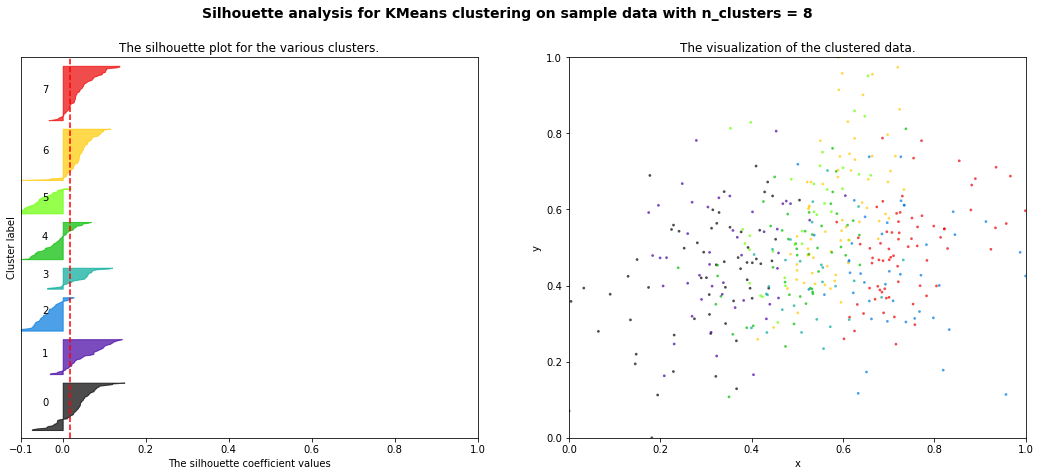

Generate folder GMM/gist/full_8
    [53, 43, 49, 28, 64, 33, 56, 74]
For n_clusters=8, Average Silhouette Coefficient is 0.0408230306184


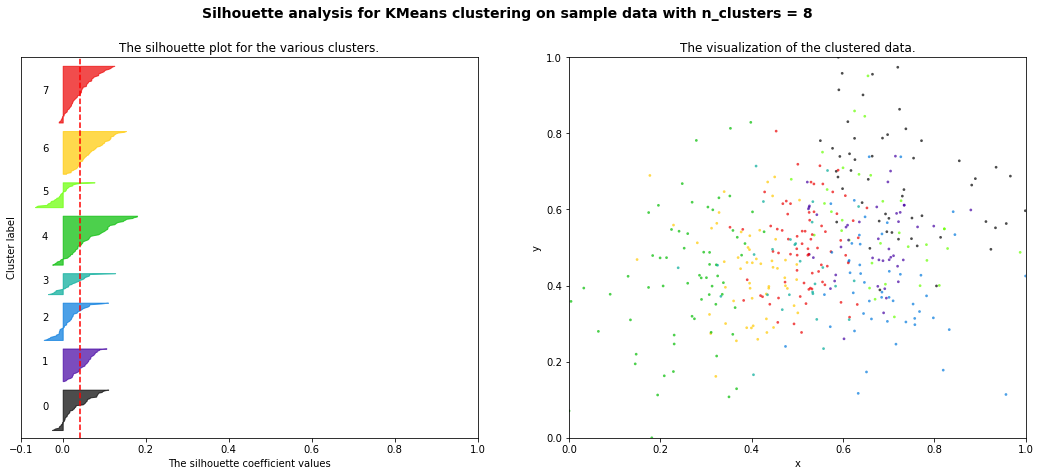

Generate folder GMM/gist/tied_8
    [58, 85, 29, 21, 42, 34, 80, 51]
For n_clusters=8, Average Silhouette Coefficient is 0.00667238598295


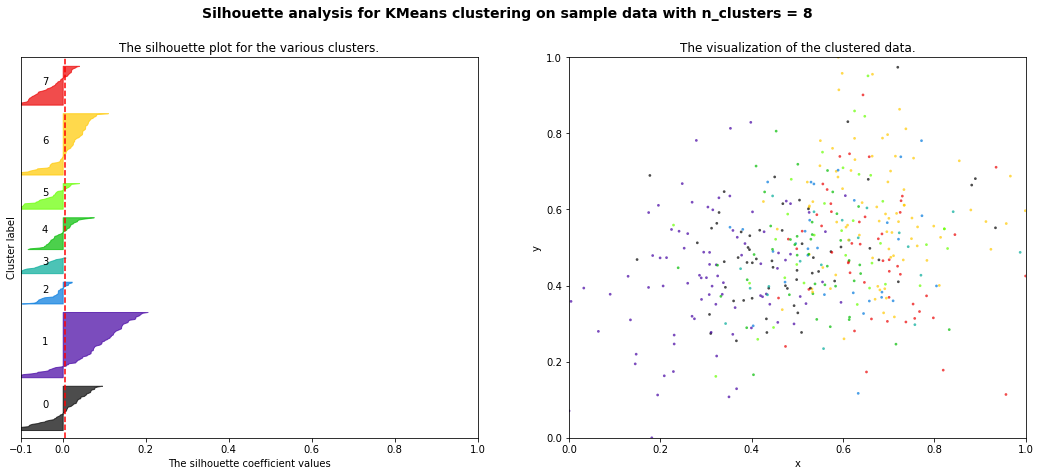

10
Generate folder GMM/gist/spherical_10
    [48, 29, 45, 38, 50, 19, 50, 28, 60, 33]
For n_clusters=10, Average Silhouette Coefficient is 0.0184293815216


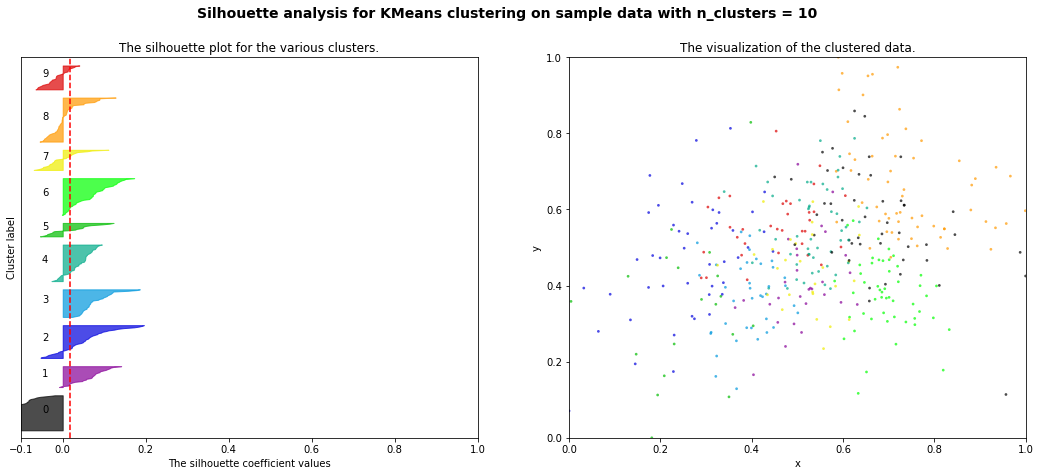

Generate folder GMM/gist/diag_10
    [60, 13, 49, 17, 40, 39, 39, 53, 47, 43]
For n_clusters=10, Average Silhouette Coefficient is -0.00229978006249


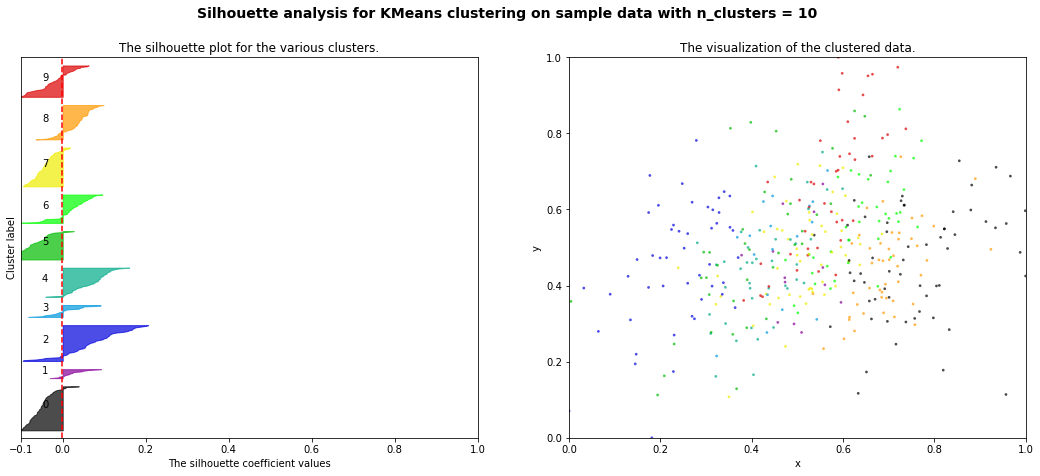

Generate folder GMM/gist/full_10
    [32, 37, 38, 19, 42, 36, 60, 63, 34, 39]
For n_clusters=10, Average Silhouette Coefficient is 0.0404922225549


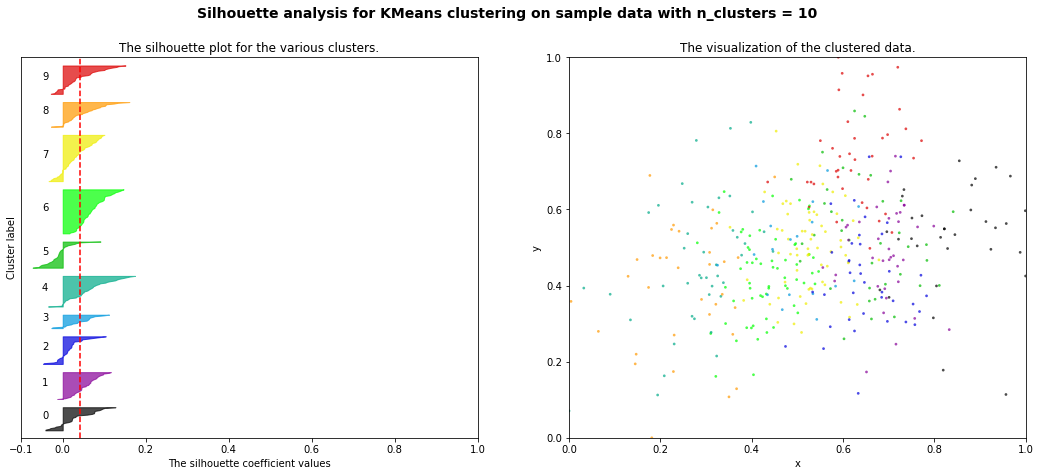

Generate folder GMM/gist/tied_10
    [97, 35, 49, 19, 33, 32, 21, 29, 39, 46]
For n_clusters=10, Average Silhouette Coefficient is -0.0190932495736


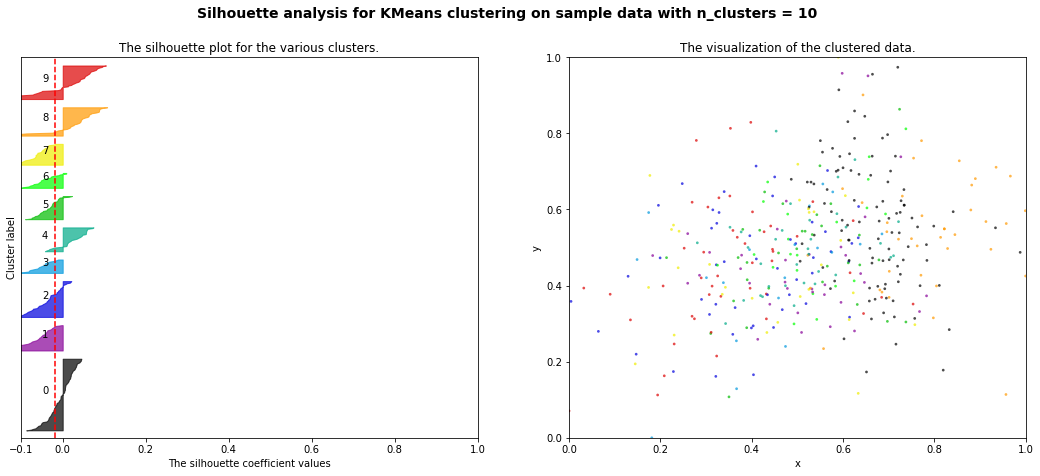

12
Generate folder GMM/gist/spherical_12
    [41, 40, 19, 25, 40, 19, 25, 39, 46, 48, 26, 32]
For n_clusters=12, Average Silhouette Coefficient is 0.020545911909


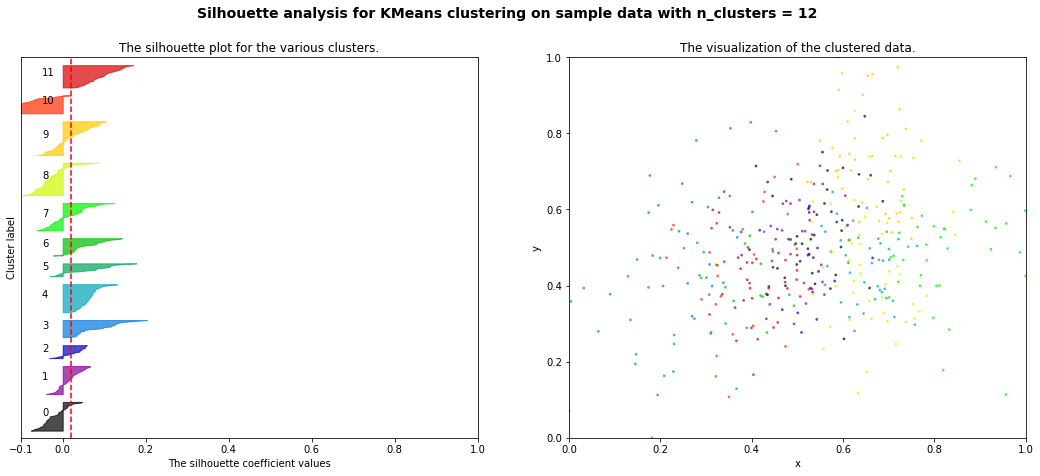

Generate folder GMM/gist/diag_12
    [8, 35, 16, 25, 16, 53, 67, 72, 25, 56, 27, 0]
For n_clusters=12, Average Silhouette Coefficient is -0.00698435010867


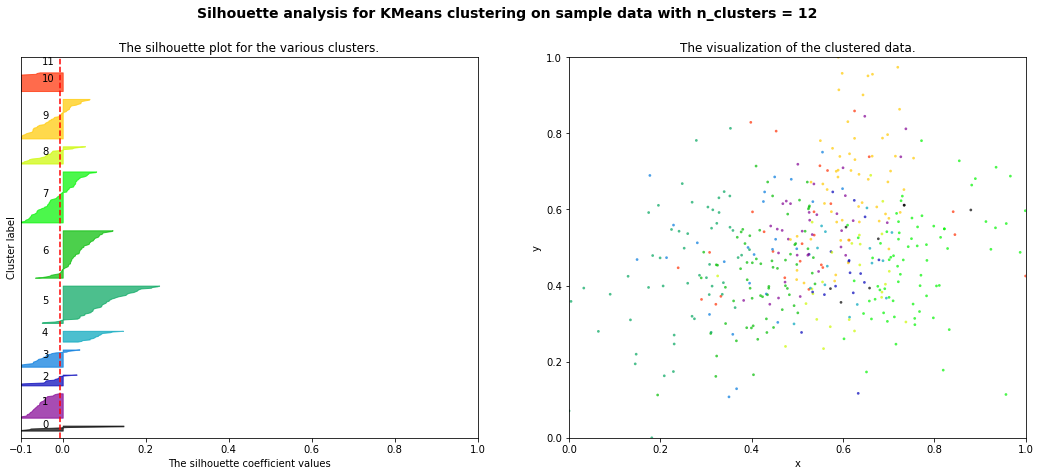

Generate folder GMM/gist/full_12
    [27, 39, 28, 22, 37, 34, 66, 63, 31, 35, 18, 0]
For n_clusters=12, Average Silhouette Coefficient is 0.038689830256


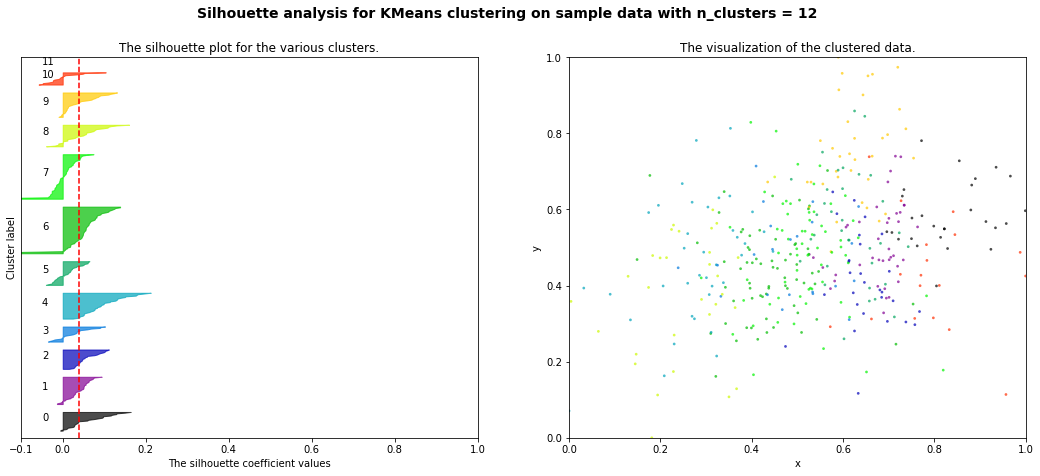

Generate folder GMM/gist/tied_12
    [27, 14, 28, 80, 53, 28, 31, 61, 31, 13, 23, 11]
For n_clusters=12, Average Silhouette Coefficient is -0.027606557595


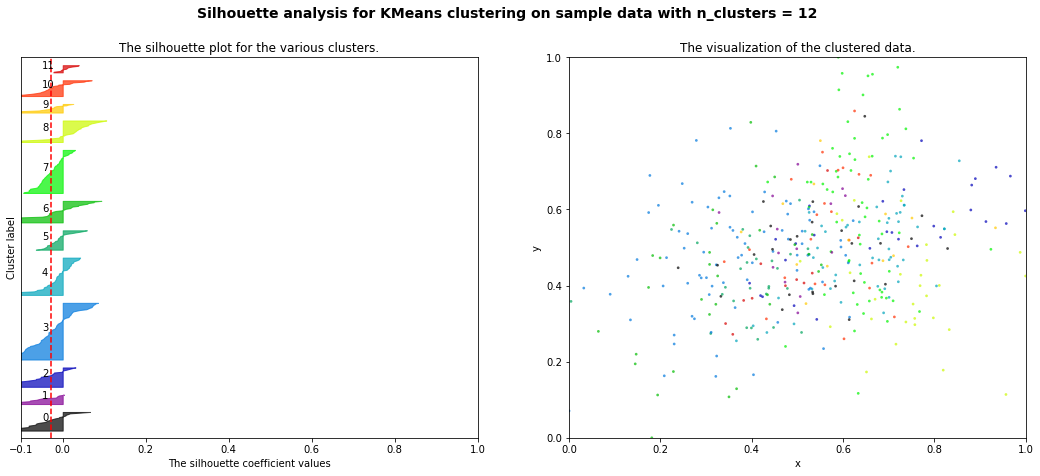

14
Generate folder GMM/gist/spherical_14
    [18, 9, 48, 28, 29, 29, 26, 20, 49, 34, 39, 3, 27, 41]
For n_clusters=14, Average Silhouette Coefficient is -0.0396528645859


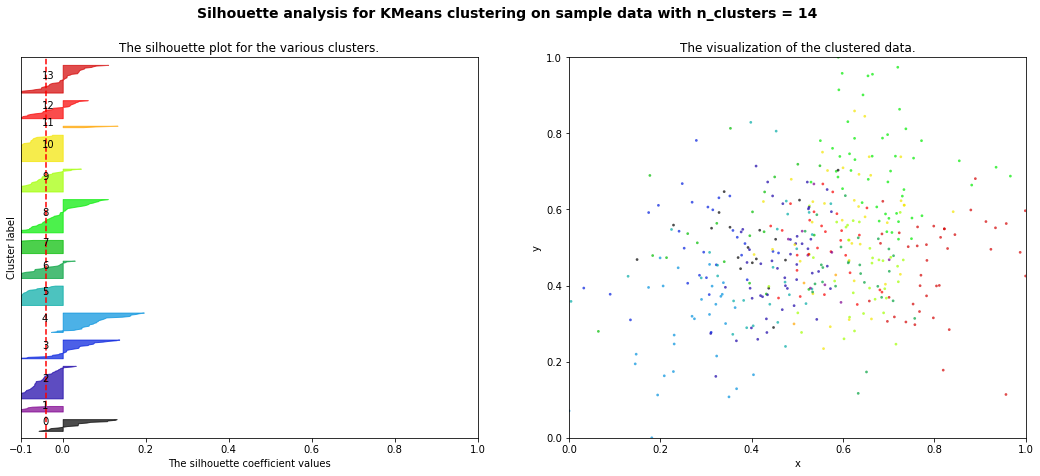

Generate folder GMM/gist/diag_14
    [31, 24, 16, 32, 28, 40, 40, 35, 24, 4, 55, 0, 27, 44]
For n_clusters=14, Average Silhouette Coefficient is -0.0153046680623


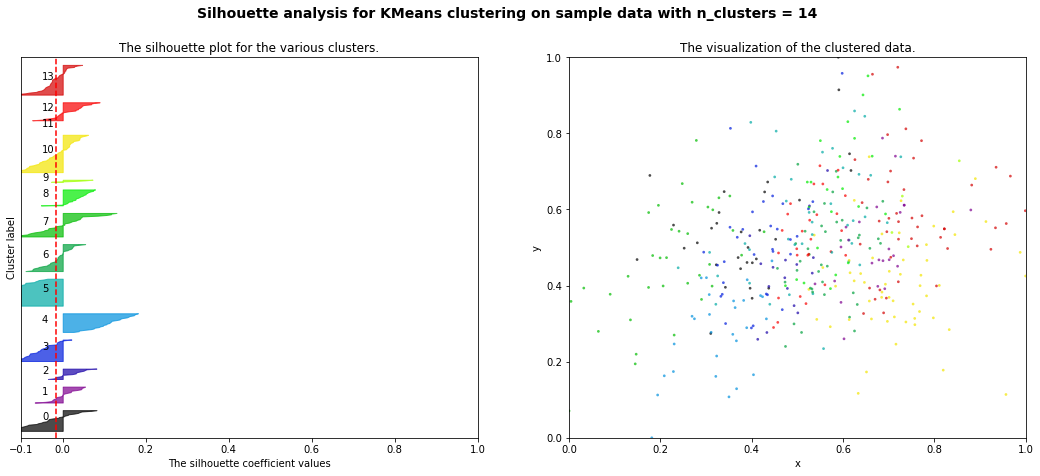

Generate folder GMM/gist/full_14
    [23, 26, 29, 20, 38, 35, 68, 39, 29, 4, 22, 0, 39, 28]
For n_clusters=14, Average Silhouette Coefficient is 0.0287422768156


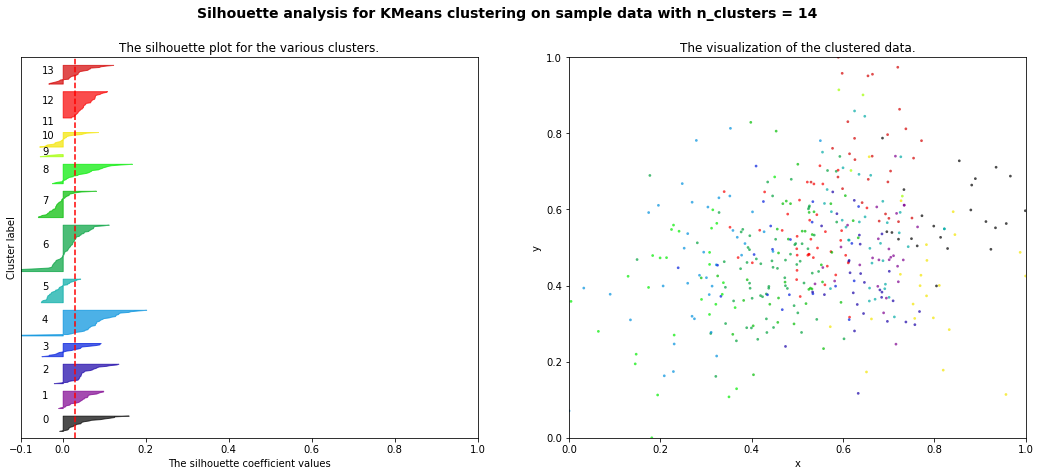

Generate folder GMM/gist/tied_14
    [19, 45, 34, 46, 31, 11, 12, 22, 24, 46, 9, 16, 32, 53]
For n_clusters=14, Average Silhouette Coefficient is -0.010522887392


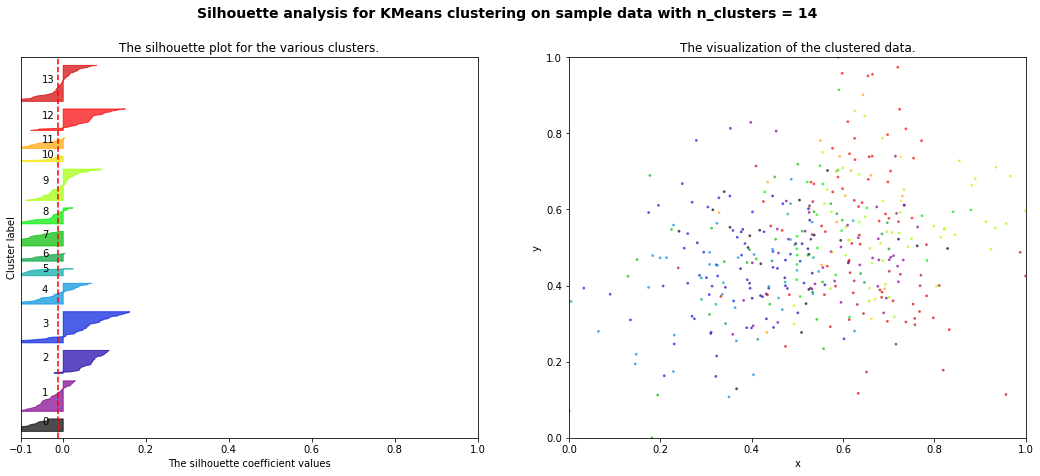

In [17]:
for n_cluster in range(4, 16, 2):
    print n_cluster
    estimators = dict((cov_type, GaussianMixture(n_components=n_cluster,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full']) 

    n_estimators = len(estimators)
    
    label_init = np.random.randint(0, n_cluster, len(features))
    
    label_pred = None
    for index, (name, estimator) in enumerate(estimators.items()):
        estimator.means_init = np.array([features[label_init == i].mean(axis=0) for i in range(n_cluster)])
        estimator.fit(features)
        label = estimator.predict(features)
        clusters = [np.where(label == i)[0] for i in range(n_cluster)]

        folder = '%s/%s_%d' % (cluster_folder, name, n_cluster)
        print 'Generate folder %s' % folder
        print '   ', [len(cluster) for cluster in clusters]
        os.makedirs(folder)
        clustering(clusters, folder, img_path, visualize_mode = True)
    
        P = transform(features)
        sil_coef_avg = silhouette_score(features, label, metric='euclidean')
        print("For n_clusters={}, Average Silhouette Coefficient is {}".format(n_cluster, sil_coef_avg))

#         model = '%s/%s_%d' % (cluster_folder, name, n_cluster)
        visualize(features, P, label, n_cluster, '%s/%s_%d/' % (cluster_folder, name, n_cluster))    
